In [1]:
import numpy as np
import pandas as pd

base_path="/Users/christophenoblanc/Documents/ProjetsPython/DSSP_Projet"

In [39]:
rows_to_import=9999999999
df=pd.read_csv(base_path+"/data_dvf/valeursfoncieres-2018.csv",
               sep='|',decimal=",",encoding="utf_8",nrows=rows_to_import,dtype=np.str,
               parse_dates=['Date mutation'])

In [40]:
# remove some columns and records
df.drop(['Code service CH', 'Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI'
        ,'4 Articles CGI','5 Articles CGI','Identifiant local','No Volume']
        , axis=1, inplace=True)

<p><b>No de disposition :</b> Dans le cas des actes comprenant plusieurs mutations – appelées "dispositions" –, chacune d'entre elles est identifiée dans les fichiers par un numéro de disposition. Seules les dispositions concernant les mutations à titre onéreux sont restituées dans le fichier.</p>
<p><b>Date mutation :</b> Date de signature de l'acte</p>
<p><b>Valeur fonciere :</b> Il s’agit du montant ou de l’évaluation déclaré dans le cadre d’une mutation à titre onéreux. La valeur foncière est le prix net vendeur. La TVA est incluse. Ce prix n’inclut pas, en revanche, les frais de notaires.
<p><b>Nature Mutation :</b>Vente, vente en l’état futur d’achèvement, vente de terrain à bâtir, adjudication, expropriation ou échange</p>
<p><b>No Voie :</b>Numéro dans la voie</p>
<p><b>B/T/Q :</b>Indice de répétition</p>
<p><b>Type de voie :</b>Exemple : Rue, avenue, etc.</p>
<p><b>Code de voie :</b>Code Rivoli (répertoire informatisé codifiant, par commune, les voies, les lieux-dits et les ensembles immobiliers)</p>
<p><b>Voie : </b>Libellé de la voie</p>
<p><b>Commune : </b>Libellé de la commune</p>
<p><b>Référence cadastrale de la parcelle (identifiant national des immeubles. Il est composé des codes département, commune, du préfixe de section, de la section et du numéro de plan, suivis pour les volumes, d’un numéro de volume, et pour les lots, d’un numéro de lot éventuellement précédé d’un numéro de volume ): </b>Code département,Code commune (code INSEE de la commune sur 3 chiffres), Préfixe de section (identifiant complémentaire utilisé pour différencier les immeubles dans le cadre des communes absorbées ou pour la gestion des quartiers dans le cas de Marseille et Toulouse. Dans le premier cas, il s’agit de l’ancien code de la commune absorbée et dans le second cas, d’un identifiant propre),Section,N° de plan</p>
<p><b>Lot(s) : </b>Un lot de copropriété est constitué d’une partie privative (appartement, cave, etc.) et d’une quote-part de partie commune (tantièmes). Seuls les 5 premiers lots sont mentionnés. Si le nombre de lots est supérieur à 5, ils ne sont pas restitués.</p>
<p><b>Nombre de lots : </b>Nombre total de lots par disposition.</p>
<p><b>Type local : </b>1 : maison ; 2 : appartement ; 3 : dépendance (isolée) ; 4 : local industriel et commercial ou assimilés</p>
<p><b>Surface reelle bati : </b>La surface réelle est la surface mesurée au sol entre les murs ou séparations et arrondie au mètre carré inférieur. Il s'agit de la somme de la surface réelle du local et de la surface des dépendances.</p>
<p><b>Nombre pieces principales : </b>espace partiellement ou entièrement cloisonné, destiné à être normalement utilisé pour y séjourner, y dormir ou prendre des repas. Ainsi, le type d’appartement (studio, T1, T2, etc.) est déterminé à partir du nombre de chambres et de salles à manger.</p>
<p><b>Nature culture : </b>Voir le document « table de référence nature de culture"nature culture » / onglet « TableNatureCulture »</p>
<p><b>Nature culture speciale : </b>Voir le document « table de référence nature de culture"nature culture » / onglet « TableNatureCultureSpéciale »</p>
<p><b>Surface terrain : </b>surface cadastrale du terrain</p>


In [42]:
dtypes_toconv={'No disposition':np.str, 'Nature mutation':np.str,'No voie':np.float64,'B/T/Q':np.str
    ,'Type de voie':np.str,'Code voie':np.str,'Voie':np.str,'Commune':np.str
    ,'Code departement':np.str,'Code commune':np.str,'Prefixe de section':np.str,'Section':np.str,'No plan':np.str
    ,'1er lot':np.str,'2eme lot':np.str,'3eme lot':np.str,'4eme lot':np.str,'5eme lot':np.str
    ,'Nombre de lots':np.float64,'Code type local':np.float64,'Type local':np.str
    ,'Surface reelle bati':np.float64,'Nombre pieces principales':np.float64
    ,'Nature culture':np.str,'Nature culture speciale':np.str,'Surface terrain':np.float64}
#dtypes_conv={}
for col, col_type in dtypes_toconv.items():
    df[col] = df[col].astype(col_type)

# Convert Date
#df['Date mutation']=pd.to_datetime(df['Date mutation'], format="%d/%m/%Y")
# Convert Floats
# Prix net vendeur, TVA incluse, hors frais de notaire, et autres frais
df['Valeur fonciere']=pd.to_numeric(df['Valeur fonciere'].str.replace(',','.'), errors='raise')
df['Surface Carrez du 1er lot'] =pd.to_numeric(df['Surface Carrez du 1er lot'].str.replace(',','.'), errors='raise').fillna(0)
df['Surface Carrez du 2eme lot']=pd.to_numeric(df['Surface Carrez du 2eme lot'].str.replace(',','.'), errors='raise').fillna(0)
df['Surface Carrez du 3eme lot']=pd.to_numeric(df['Surface Carrez du 3eme lot'].str.replace(',','.'), errors='raise').fillna(0)
df['Surface Carrez du 4eme lot']=pd.to_numeric(df['Surface Carrez du 4eme lot'].str.replace(',','.'), errors='raise').fillna(0)
df['Surface Carrez du 5eme lot']=pd.to_numeric(df['Surface Carrez du 5eme lot'].str.replace(',','.'), errors='raise').fillna(0)
df['Surface Carrez total']=df['Surface Carrez du 1er lot']+df['Surface Carrez du 2eme lot'] \
        +df['Surface Carrez du 3eme lot']+df['Surface Carrez du 4eme lot']+df['Surface Carrez du 5eme lot']
# Remove records with NULL Target value
df.dropna(axis=0, subset=['Valeur fonciere'], inplace=True) # remove records which we do not know the price

In [117]:
#print(df.head())
df.groupby('Type local').count()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez total
Type local,,,,,,,,,,,,,,,,,,,,,
Appartement,365812,365812,365812,365812,362787,365812,365812,365812,365812,365801,...,365812,365812,365812,365812,365799,365799,365812,365812,80608,365812
Dépendance,279787,279787,279787,279787,275802,279787,279787,279787,279787,279777,...,279787,279787,279787,279787,279775,279775,279787,279787,63488,279787
Local industriel. commercial ou assimilé,83010,83010,83010,83010,81780,83010,83010,83010,83010,83005,...,83010,83010,83010,83010,81327,81327,83010,83010,47812,83010
Maison,477602,477602,477602,477602,475506,477602,477602,477602,477602,477573,...,477602,477602,477602,477602,477599,477599,477602,477602,456603,477602
nan,1111520,1111520,1111520,1111520,152553,1111520,1111520,1111520,1111520,1080814,...,1111520,1111520,1111520,0,0,0,1111520,1111520,949192,1111520


In [44]:
print(type(df))
#print(df["Date mutation"])
for col in df.columns:
    print("Column ",col,": type=",df[col].dtype)

<class 'pandas.core.frame.DataFrame'>
Column  No disposition : type= object
Column  Date mutation : type= datetime64[ns]
Column  Nature mutation : type= object
Column  Valeur fonciere : type= float64
Column  No voie : type= float64
Column  B/T/Q : type= object
Column  Type de voie : type= object
Column  Code voie : type= object
Column  Voie : type= object
Column  Code postal : type= object
Column  Commune : type= object
Column  Code departement : type= object
Column  Code commune : type= object
Column  Prefixe de section : type= object
Column  Section : type= object
Column  No plan : type= object
Column  1er lot : type= object
Column  Surface Carrez du 1er lot : type= float64
Column  2eme lot : type= object
Column  Surface Carrez du 2eme lot : type= float64
Column  3eme lot : type= object
Column  Surface Carrez du 3eme lot : type= float64
Column  4eme lot : type= object
Column  Surface Carrez du 4eme lot : type= float64
Column  5eme lot : type= object
Column  Surface Carrez du 5eme lot

In [45]:
#print(df["No disposition"].head())
#print(df["Valeur fonciere"].head())

#col_name="Surface terrain"
#print(df[col_name].head())
#df[col_name].dtype

In [46]:
# Quick Graphs to see some data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')

In [115]:
ventes_par_jour=pd.DataFrame(df.groupby('Date mutation')['Valeur fonciere'].count())
ventes_par_jour.columns=['Nombre de mutations']
ventes_par_jour['weekday']=ventes_par_jour.index.weekday

#ventes_par_jour.reset_index(level=0, inplace=True)

# Exclure les dimanches
#ventes_par_jour['weekday']=ventes_par_jour.index.weekday
ventes_hors_dimanche=ventes_par_jour[ventes_par_jour.index.weekday != 6].drop(['weekday'], axis=1)
ventes_hors_weekend=ventes_hors_dimanche[ventes_hors_dimanche.index.weekday != 5]

#Peu de ventes
#ventes_hors_dimanche[ventes_hors_dimanche['Nombre de mutations']<10]
#ventes_par_jour

[Text(0, 0.5, 'Nombre de mutations'),
 Text(0.5, 1.0, 'Nombre de mutations foncières en 2018 (hors week-end)')]

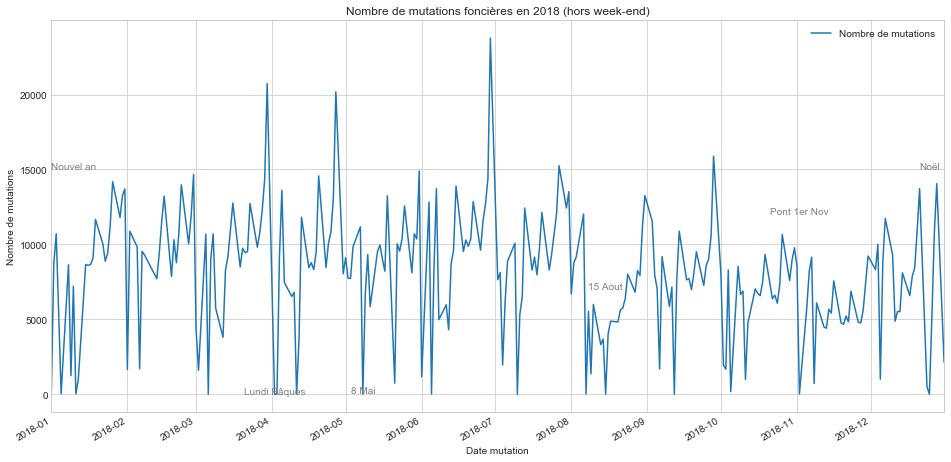

In [116]:
fig,ax=plt.subplots(figsize=(16,8))
ventes_hors_weekend.plot(ax=ax);
style=dict(size=10,color='grey')
ax.text('2018-01-01',15000,'Nouvel an',**style)
ax.text('2018-04-02',0,'Lundi Pâques',ha='center',**style)
ax.text('2018-05-08',100,'8 Mai',ha='center',**style)
ax.text('2018-08-15',7000,'15 Aout',ha='center',**style)
ax.text('2018-11-02',12000,'Pont 1er Nov',ha='center',**style)
ax.text('2018-12-25',15000,'Noël',ha='center',**style)
ax.set(title="Nombre de mutations foncières en 2018 (hors week-end)",ylabel="Nombre de mutations")

In [140]:
Maisons=df[(df['Type local']=='Maison')]
Maisons=Maisons[(Maisons['Surface Carrez total']!=0)]
Maisons=Maisons[(Maisons['Valeur fonciere']<=1000000)]
#Maisons.iloc[1]

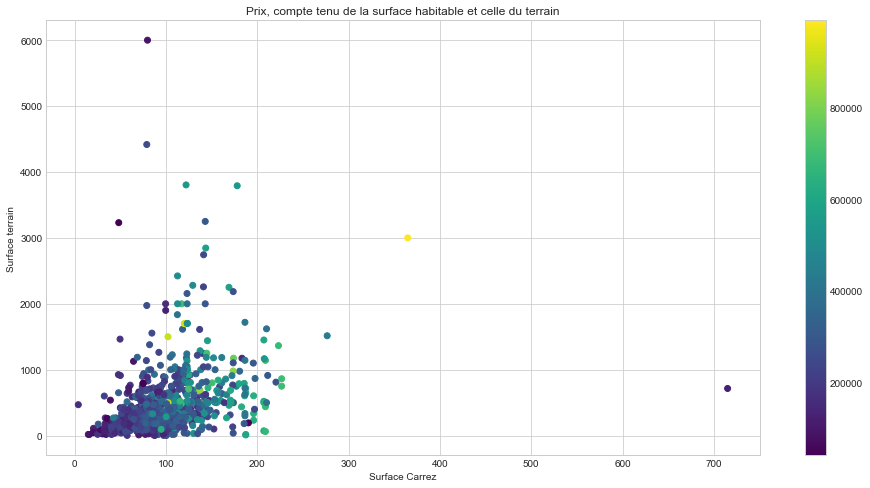

In [143]:
# Plot only the Houses in 2018
fig,ax=plt.subplots(figsize=(16,8))
style=dict(size=18,color='blackgrey')
plt.scatter(x=Maisons['Surface Carrez total'],y=Maisons['Surface terrain'],c=Maisons['Valeur fonciere']
           ,cmap='viridis')
plt.colorbar()
ax.set(title="Prix, compte tenu de la surface habitable et celle du terrain"
       ,xlabel="Surface Carrez",ylabel="Surface terrain");